In [1]:
import numpy as np
import pandas as pd
import time

# for classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

# for analysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm

# For ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import RocCurveDisplay

# limit warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# get data and parse
# read directly from the website link
# df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)
# read from downloadeded directory

df = pd.read_csv('wdbc.data', header=None)

# Preprocessing

## Setting headers

In [3]:
# assign collumn names
df.columns = [
    "ID","Diagnosis","mean radius", "mean texture","mean perimeter", "mean area", 
    "mean smoothness","mean compactness", "mean concavity", "mean concave points",
    "mean symmetry", "mean fractal dimension","se radius", "se texture","se perimeter", 
    "se area", "se smoothness","se compactness", "se concavity", "se concave points",
    "se symmetry", "se fractal dimension","largest radius", "largest texture",
    "largest perimeter", "largest area", "largest smoothness","largest compactness", 
    "largest concavity","largest concave points",
    "largest symmetry", "largest fractal␣dimension"
]

## Shuffling dataset

In [4]:
# before shuffling dataframe
df.head()

,ID,Diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,...,largest radius,largest texture,largest perimeter,largest area,largest smoothness,largest compactness,largest concavity,largest concave points,largest symmetry,largest fractal␣dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# shuffling dataframe for accurate modeling
df = df.sample(frac=1, random_state=40).reset_index(drop=True)

In [6]:
# after shuffling dataframe
df.head()

,ID,Diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,...,largest radius,largest texture,largest perimeter,largest area,largest smoothness,largest compactness,largest concavity,largest concave points,largest symmetry,largest fractal␣dimension
0,891923,B,13.77,13.27,88.06,582.7,0.09198,0.06221,0.01063,0.01917,...,14.67,16.93,94.17,661.1,0.1170,0.1072,0.03732,0.05802,0.2823,0.06794
1,848406,M,14.68,20.13,94.74,684.5,0.09867,0.07200,0.07395,0.05259,...,19.07,30.88,123.40,1138.0,0.1464,0.1871,0.29140,0.16090,0.3029,0.08216
2,907915,B,12.40,17.68,81.47,467.8,0.10540,0.13160,0.07741,0.02799,...,12.88,22.91,89.61,515.8,0.1450,0.2629,0.24030,0.07370,0.2556,0.09359
3,911201,B,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,...,15.80,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810
4,84799002,M,14.54,27.54,96.73,658.8,0.11390,0.15950,0.16390,0.07364,...,17.46,37.13,124.10,943.2,0.1678,0.6577,0.70260,0.17120,0.4218,0.13410


## Checking distribution of target variable

<AxesSubplot: >

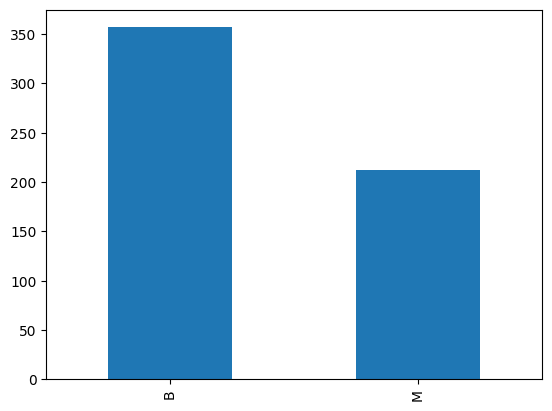

In [7]:
df['Diagnosis'].value_counts().plot.bar()

In [8]:
df['Diagnosis'].value_counts(normalize=True) * 100
# The data is mildly imbalanced

B    62.741652
M    37.258348
Name: Diagnosis, dtype: float64

In [9]:
# check for missing data andn obvious issues
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         569 non-null    int64  
 1   Diagnosis                  569 non-null    object 
 2   mean radius                569 non-null    float64
 3   mean texture               569 non-null    float64
 4   mean perimeter             569 non-null    float64
 5   mean area                  569 non-null    float64
 6   mean smoothness            569 non-null    float64
 7   mean compactness           569 non-null    float64
 8   mean concavity             569 non-null    float64
 9   mean concave points        569 non-null    float64
 10  mean symmetry              569 non-null    float64
 11  mean fractal dimension     569 non-null    float64
 12  se radius                  569 non-null    float64
 13  se texture                 569 non-null    float64

In [10]:
# check if column is unique 
column_names = df.columns 
for i in column_names:
  print('{} is unique: {}'.format(i, df[i].is_unique))

ID is unique: True
Diagnosis is unique: False
mean radius is unique: False
mean texture is unique: False
mean perimeter is unique: False
mean area is unique: False
mean smoothness is unique: False
mean compactness is unique: False
mean concavity is unique: False
mean concave points is unique: False
mean symmetry is unique: False
mean fractal dimension is unique: False
se radius is unique: False
se texture is unique: False
se perimeter is unique: False
se area is unique: False
se smoothness is unique: False
se compactness is unique: False
se concavity is unique: False
se concave points is unique: False
se symmetry is unique: False
se fractal dimension is unique: False
largest radius is unique: False
largest texture is unique: False
largest perimeter is unique: False
largest area is unique: False
largest smoothness is unique: False
largest compactness is unique: False
largest concavity is unique: False
largest concave points is unique: False
largest symmetry is unique: False
largest frac

## Creating data and target sets

In [11]:
# setting data(X) and target(y)
X, y = df.loc[:,"mean radius":], df["Diagnosis"]

In [12]:
# getting X shape
X.shape

(569, 30)

In [13]:
# getting y shape
y.shape

(569,)

## Splitting data

In [14]:
# split data
X_train, X_test, y_train, y_test = X[:400], X[400:], y[:400], y[400:]

In [15]:
#confirming training set dimensions
X_train.shape

(400, 30)

In [16]:
#confirming test set dimensions
X_test.shape

(169, 30)

In [17]:
# init scores variable for performance analysis
scores = {}

# Decision Tree

Training Time Complexity = O( n * log(n) * d )

n = number of points in the Training set; d = dimentionality of the data

In [18]:
# creating decision tree
tree_clf = DecisionTreeClassifier(max_depth=5,random_state=42)
start = time.time()
tree_clf.fit(X_train, y_train)
stop = time.time()
print(f"Training time for Decision Tree: {round((stop - start),7)}s")

tree_clf_pred = tree_clf.predict(X_test)

Training time for Decision Tree: 0.0080986s


In [19]:
# printing accuracy score
tree_Accuracy = round(accuracy_score(y_test, tree_clf_pred),5) 
scores["dt"] = tree_Accuracy
print("Accuracy of Decision Tree:", tree_Accuracy)

Accuracy of Decision Tree: 0.9645


In [20]:
# Decision Tree Score
print("Decision Tree Training Score:", tree_clf.score(X_train, y_train))

Decision Tree Training Score: 0.99


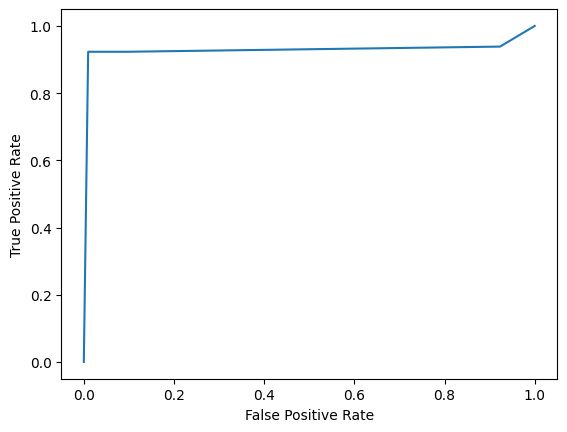

In [21]:
y_score1 = tree_clf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score1,pos_label=tree_clf.classes_[1])

#make the ROC curve
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [22]:
# AUC Score
print("AUC Score:", round((metrics.auc(fpr, tpr)),4))

AUC Score: 0.9286


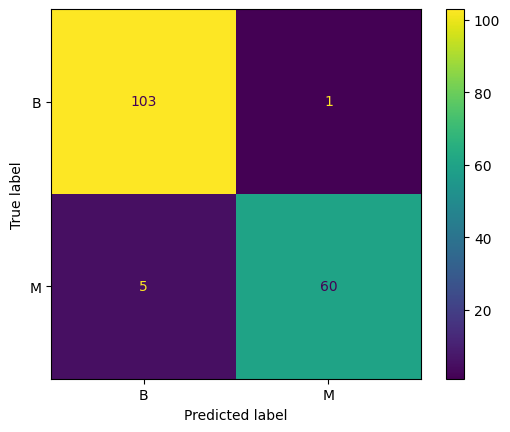

In [23]:
# plot confusion matrix for decision tree
plot_confusion_matrix(tree_clf, X_test, y_test)
plt.show()

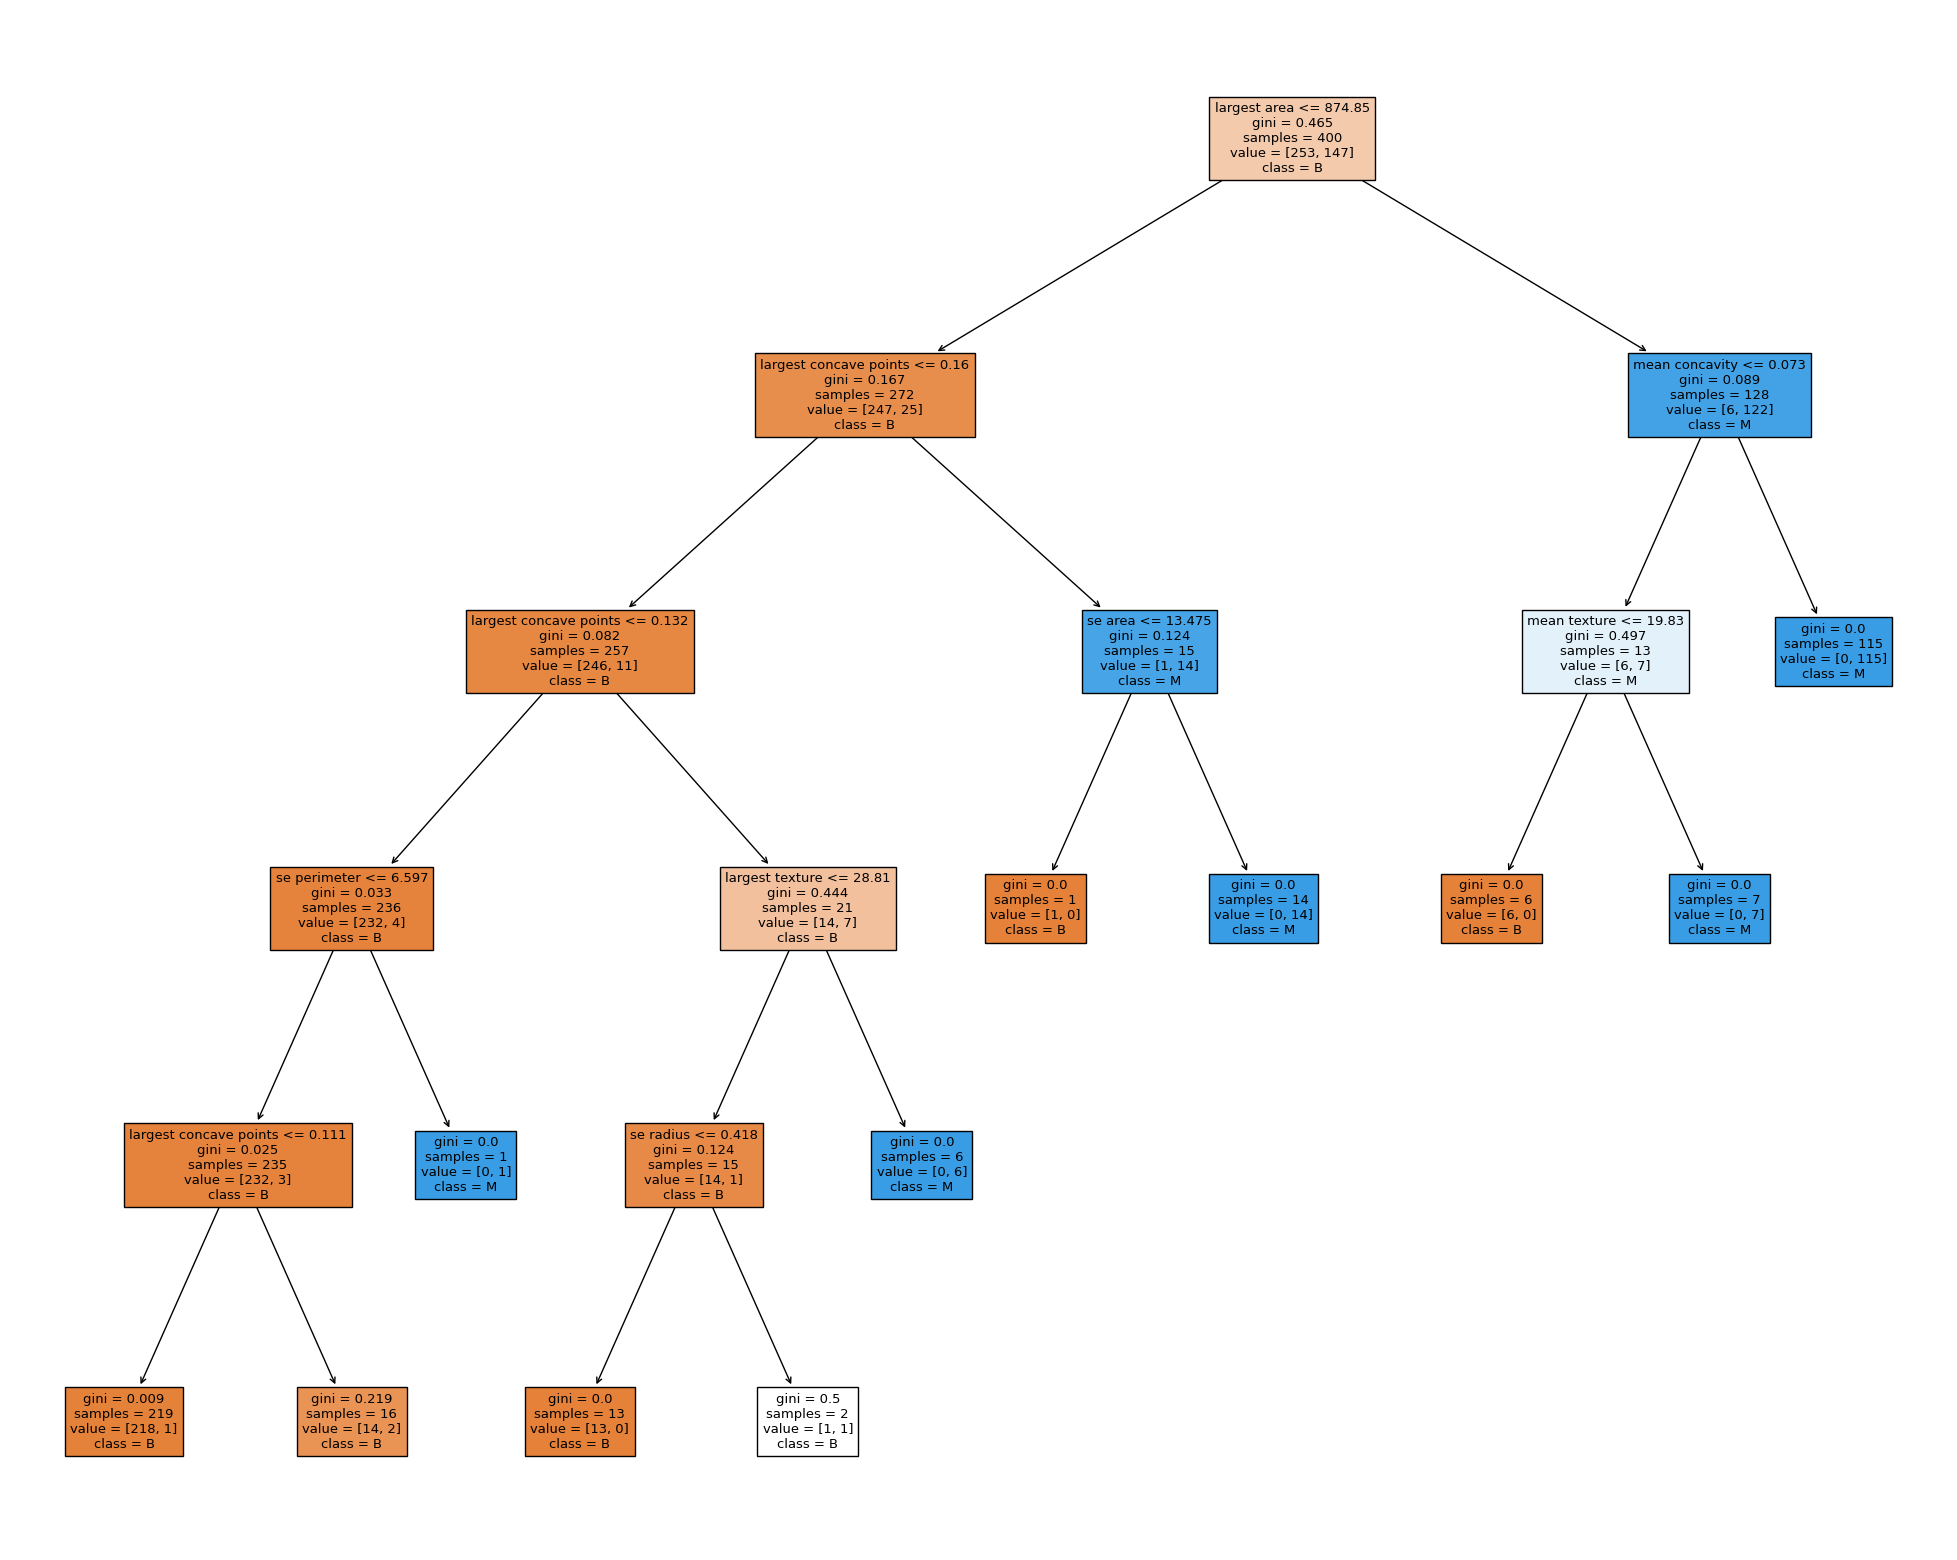

In [24]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_clf, 
                   feature_names=df.columns[2:],  
                   class_names=df["Diagnosis"],
                   filled=True)

# Logistic Regression

Train Time Complexity = O(n * d)

n = number of instances; d = number of dimensions

In [25]:
# creating logistic regression model
start = time.time()
log_clf = LogisticRegression(random_state=42).fit(X_train, y_train)
stop = time.time()
print(f"Training time for Logistic Regression: {round((stop - start),7)}s")
log_clf_pred = log_clf.predict(X_test)

Training time for Logistic Regression: 0.0317152s


In [26]:
# Accuracy Score
log_Accuracy = round(accuracy_score(y_test, log_clf_pred),5)
scores["log"] = log_Accuracy
print("Accuracy of Logistic Regression:", log_Accuracy)

Accuracy of Logistic Regression: 0.94675


In [27]:
# Logistic Regression Training Score
print("Logistic Regression Training Score:", log_clf.score(X_train, y_train))

Logistic Regression Training Score: 0.9425


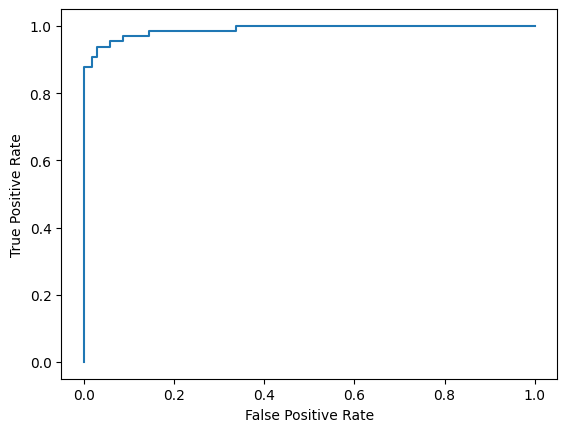

In [28]:
y_score2 = log_clf.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score2, pos_label=log_clf.classes_[1])

#make the ROC curve
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [29]:
# AUC Score
print("AUC Score:", round((metrics.auc(fpr, tpr)),4))

AUC Score: 0.9889


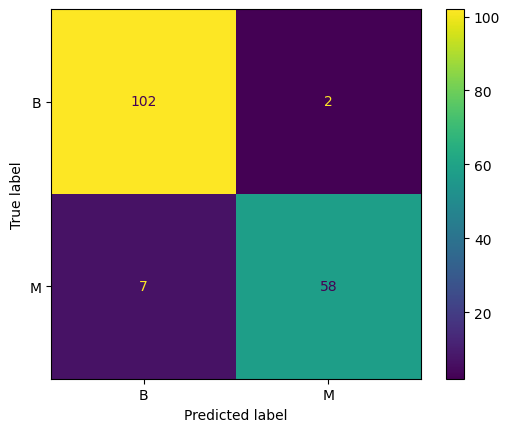

In [30]:
# plot confusion matrix for logistic regression
plot_confusion_matrix(log_clf, X_test, y_test)  
plt.show()

# K-Nearest-Neighbors

Train Time Complexity = O(knd)

Loops through every training observation and computes the distance d between the training set observation and new observation.

In [31]:
# creating KNN classifiers
knn5_clf = KNeighborsClassifier(n_neighbors = 5)
knn1_clf = KNeighborsClassifier(n_neighbors=1)
knn50_clf = KNeighborsClassifier(n_neighbors=50)

In [32]:
# fitting/predicting classifiers

start = time.time()
knn1_clf.fit(X_train, y_train)
stop = time.time()
print(f"Training time for K-Nearest Neighbors Regression with n_neighbors = 1: {round((stop - start),7)}s")

start = time.time()
knn5_clf.fit(X_train, y_train)
stop = time.time()
print(f"Training time for K-Nearest Neighbors Regression with n_neighbors = 5: {round((stop - start),7)}s")

start = time.time()
knn50_clf.fit(X_train, y_train)
stop = time.time()
print(f"Training time for K-Nearest Neighbors Regression with n_neighbors = 50: {round((stop - start),7)}s")

knn5_clf_pred = knn5_clf.predict(X_test)
knn1_clf_pred = knn1_clf.predict(X_test)
knn50_clf_pred = knn50_clf.predict(X_test)

Training time for K-Nearest Neighbors Regression with n_neighbors = 1: 0.001194s
Training time for K-Nearest Neighbors Regression with n_neighbors = 5: 0.0020199s
Training time for K-Nearest Neighbors Regression with n_neighbors = 50: 0.0019929s


In [33]:
#printing accuracy scores
knn1_Accuracy = round(accuracy_score(y_test, knn1_clf_pred),5)
knn5_Accuracy = round(accuracy_score(y_test, knn5_clf_pred),5)
knn50_Accuracy = round(accuracy_score(y_test, knn50_clf_pred),5)
scores["knn1"] = knn1_Accuracy
scores["knn5"] = knn5_Accuracy
scores["knn50"] = knn50_Accuracy
print("Accuracy for KNN with k=1", knn1_Accuracy)
print("Accuracy for KNN with k=5", knn5_Accuracy)
print("Accuracy for KNN with k=50",knn50_Accuracy)

Accuracy for KNN with k=1 0.92308
Accuracy for KNN with k=5 0.93491
Accuracy for KNN with k=50 0.89349


In [34]:
# KNN Training Score
print("Knn = 1 Training Score:",knn1_clf.score(X_train, y_train))
print("Knn = 5 Training Score:",knn5_clf.score(X_train, y_train))
print("Knn = 50 Training Score:",knn50_clf.score(X_train, y_train))

Knn = 1 Training Score: 1.0
Knn = 5 Training Score: 0.9375
Knn = 50 Training Score: 0.905


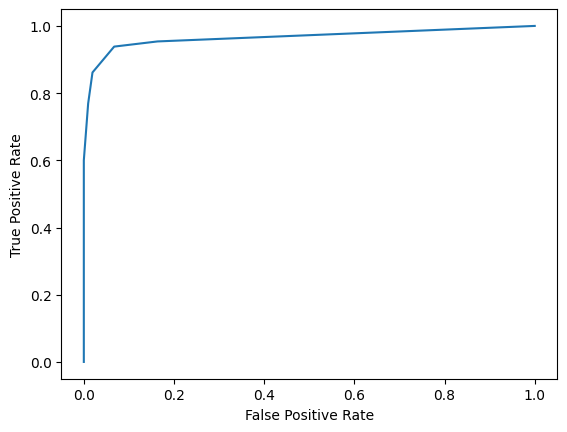

In [35]:
y_score3 = knn5_clf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score3,pos_label=knn5_clf.classes_[1])
#make the ROC curve
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [36]:
# AUC Score
print("AUC Score:", round((metrics.auc(fpr, tpr)),4))

AUC Score: 0.9659


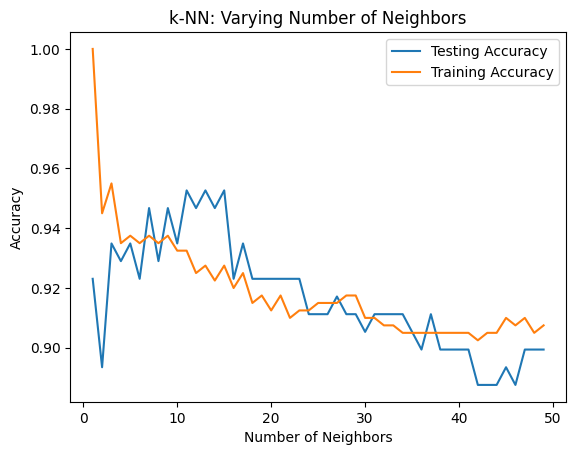

In [37]:
# plotting training and testing accuracies
no_neighbors = np.arange(1, 50)
train_accuracy = np.empty(len(no_neighbors))
test_accuracy = np.empty(len(no_neighbors))

for i, k in enumerate(no_neighbors):
    # We instantiate the classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    # Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(no_neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(no_neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

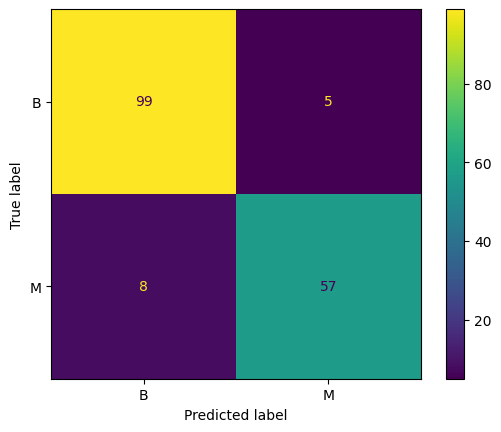

In [38]:
# plot confusion matrix for knn=1
plot_confusion_matrix(knn1_clf, X_test, y_test)  
plt.show()

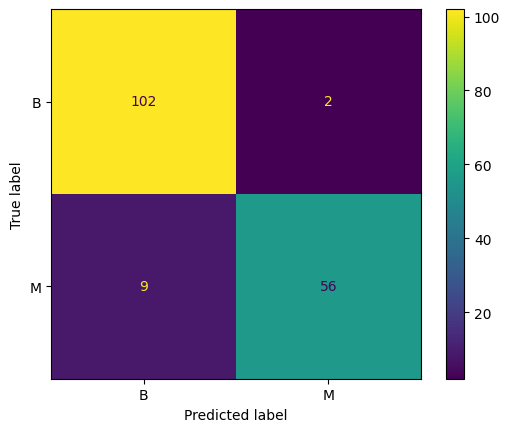

In [39]:
# plot confusion matrix for knn=5
plot_confusion_matrix(knn5_clf, X_test, y_test)  
plt.show()

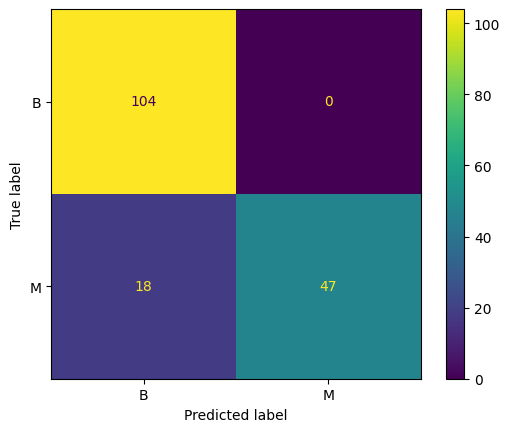

In [40]:
# plot confusion matrix for knn=50
plot_confusion_matrix(knn50_clf, X_test, y_test)  
plt.show()

# Linear Support Vector Machines (SVM)

Training Time Complexity = O(n²)

In [41]:
# fitting/predicting SVM classifiers
svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

start = time.time()
svm_clf.fit(X_train, y_train)
stop = time.time()
print(f"Training time for Support Vector Machines: {stop - start}s")

svm_clf_pred = svm_clf.predict(X_test)

Training time for Support Vector Machines: 0.005898475646972656s


In [42]:
svm_Accuracy = round(accuracy_score(y_test, svm_clf_pred),5)
scores["SVM"] = svm_Accuracy
print("Accuracy of SVM:", svm_Accuracy)

Accuracy of SVM: 0.95858


In [43]:
# SVM Training Score
print("SVM Training Score:", svm_clf.score(X_train, y_train))

SVM Training Score: 0.99


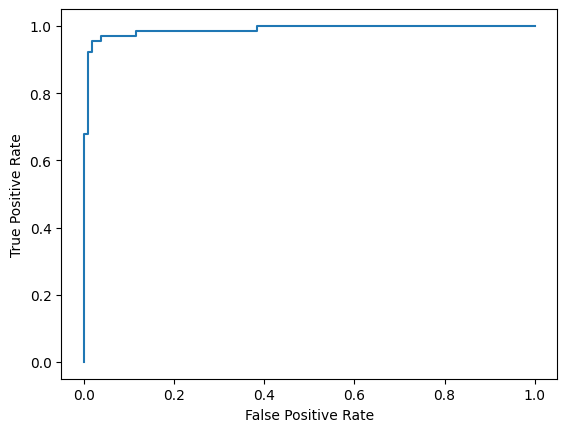

In [44]:
y_score4 = svm_clf.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score4,pos_label=svm_clf.classes_[1])

#make the ROC curve
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [45]:
# AUC Score
print("AUC Score:", round((metrics.auc(fpr, tpr)),4))

AUC Score: 0.9888


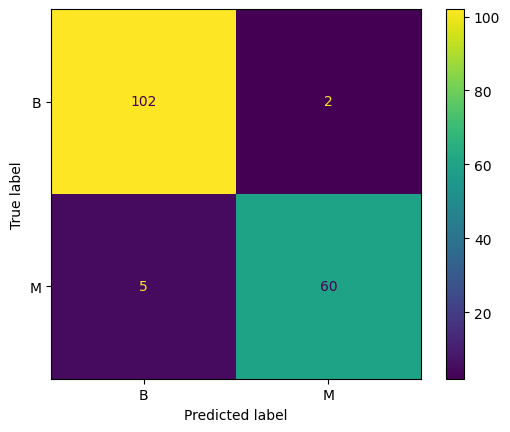

In [46]:
# plot confusion matrix for support vector machine
plot_confusion_matrix(svm_clf, X_test, y_test)  
plt.show()

# ENSEMBLES

In [47]:
# creating an ensemble with hard voting
voting_clf = VotingClassifier(
    estimators=[('dt', tree_clf), ('lr', log_clf), ('knn', knn5_clf), ('svm', svm_clf)],
    voting='hard') # hard voting

start =time.time()
voting_clf.fit(X_train, y_train)
stop = time.time()
print(f"Training time for Hard Voting Ensemble of previous models: {stop - start}s")

voting_clf_pred = voting_clf.predict(X_test)

Training time for Hard Voting Ensemble of previous models: 0.04138994216918945s


In [48]:
voting_Accuracy = round(accuracy_score(y_test, voting_clf_pred),5)
scores["Voting"] = voting_Accuracy 
print("Accuracy for Ensemble:", voting_Accuracy)

Accuracy for Ensemble: 0.95858


In [49]:
# Ensemble Training Score
print("Ensemble Training Score: ",voting_clf.score(X_train, y_train))

Ensemble Training Score:  0.9675


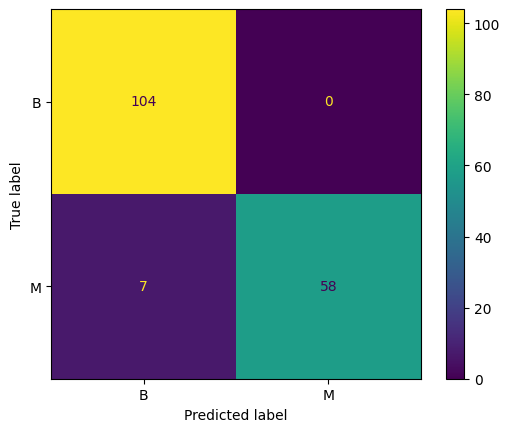

In [50]:
# plot confusion matrix for ensemble 
plot_confusion_matrix(voting_clf, X_test, y_test)  
plt.show()

# Random Forest

Training Time Complexity= O( n log(n) * d * k )

k = number of Decision Trees;
n = number of points in the training set;
d = dimentionality of the data

In [51]:
# creating/fitting/predicting random forest classifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)

start=time.time()
rnd_clf.fit(X_train, y_train)
stop = time.time()
print(f"Training time for Random Forest: {round((stop - start),4)}s")

y_pred_rf = rnd_clf.predict(X_test)

Training time for Random Forest: 0.6352s


In [52]:
RF_Accuracy = round(accuracy_score(y_test, y_pred_rf),5)
scores["RF"] = RF_Accuracy
print("Accuracy for Random Forest:", RF_Accuracy)

Accuracy for Random Forest: 0.97633


In [53]:
# Random Forest Training Score
print("Random Forest Training Score: ", rnd_clf.score(X_train, y_train))

Random Forest Training Score:  0.9975


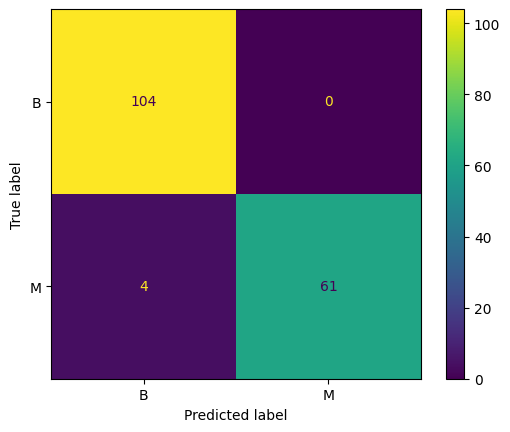

In [54]:
# plot confusion matrix for random forest
plot_confusion_matrix(rnd_clf, X_test, y_test)  
plt.show()

## Feature Importance

mean radius 0.05352337851579516
mean texture 0.014064374359359956
mean perimeter 0.042484401982541595
mean area 0.04048570866027096
mean smoothness 0.006489143448698442
mean compactness 0.01159264037838075
mean concavity 0.06163384355268729
mean concave points 0.09952645502136145
mean symmetry 0.0035234934281047313
mean fractal dimension 0.004010520469966127
se radius 0.016913298075992775
se texture 0.003031471211331144
se perimeter 0.012253586743827547
se area 0.03641401446817843
se smoothness 0.004343721147771931
se compactness 0.004214489900423028
se concavity 0.006375366026611922
se concave points 0.004391693233867603
se symmetry 0.004208988885334401
se fractal dimension 0.00534646700341577
largest radius 0.07832642053671345
largest texture 0.01754259406707254
largest perimeter 0.11637279505051261
largest area 0.1251733098133006
largest smoothness 0.01052501768126008
largest compactness 0.018346434365226958
largest concavity 0.04009715766220668
largest concave points 0.138318990919

<AxesSubplot: >

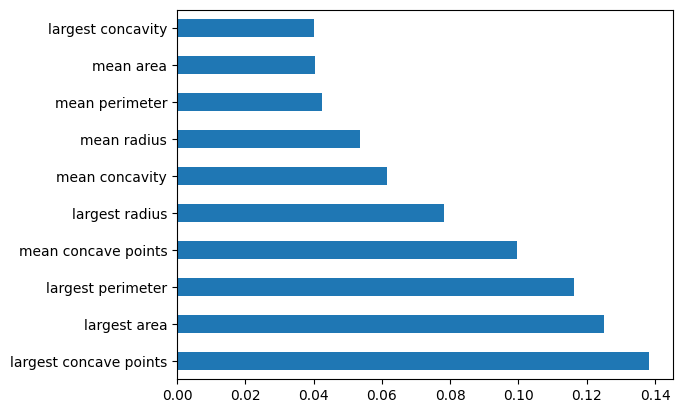

In [55]:
for name, score in zip(X.columns, rnd_clf.feature_importances_):
    print(name, score)
    
feat_importances = pd.Series(rnd_clf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh') #horizontal bar graph

<AxesSubplot: >

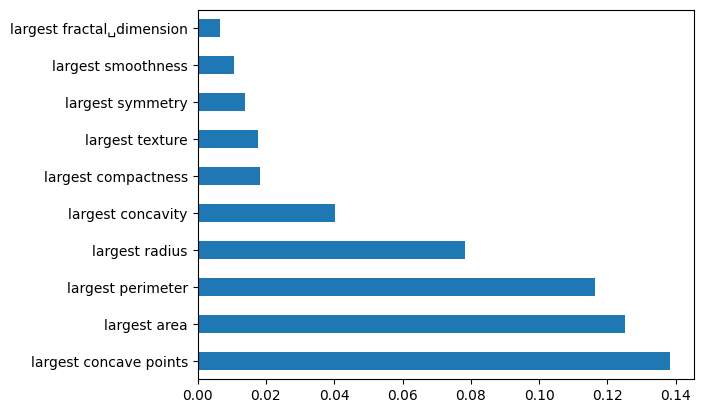

In [56]:
# get only columns with name "largest" in them
largest_cols =[x for x in X if "largest" in x] 

feat_importances[largest_cols].sort_values(ascending=False).plot(kind='barh') #horizontal bar graph

<AxesSubplot: >

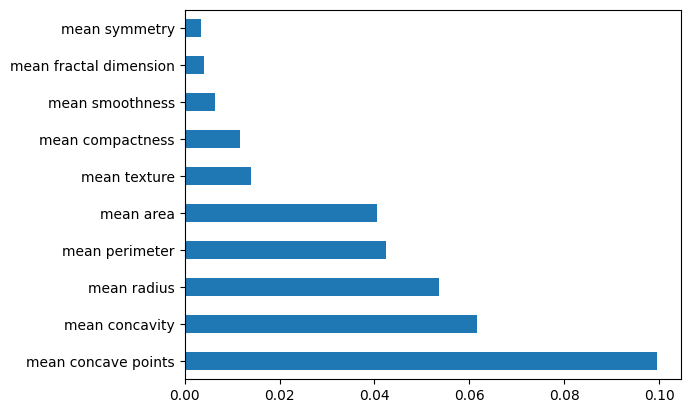

In [57]:
# get only columns with name "mean" in them
mean_cols =[x for x in X if "mean" in x] 

feat_importances[mean_cols].sort_values(ascending=False).plot(kind='barh') #horizontal bar graph

<AxesSubplot: >

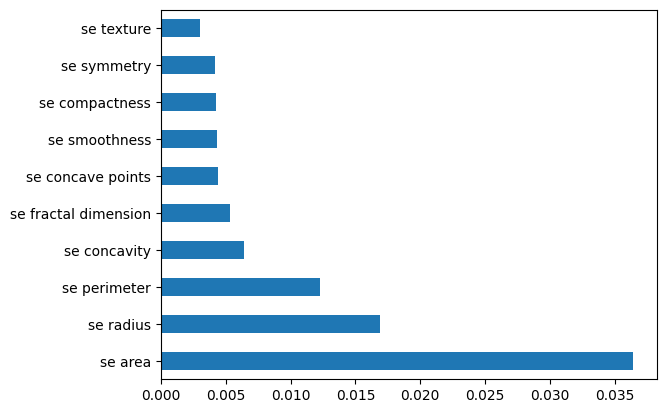

In [58]:
#get only columns with name "se" in them
se_cols =[x for x in X if "se" in x] 

feat_importances[se_cols].sort_values(ascending=False).plot(kind='barh') #horizontal bar graph

## Decision tree sample from Random Forest

In [59]:
# sampled decision tree from random forest
estimator = rnd_clf.estimators_[100]

[Text(0.5957446808510638, 0.9375, 'largest concave points <= 0.136\ngini = 0.475\nsamples = 248\nvalue = [245, 155]\nclass = B'),
 Text(0.40425531914893614, 0.8125, 'se radius <= 0.665\ngini = 0.105\nsamples = 159\nvalue = [238, 14]\nclass = B'),
 Text(0.3191489361702128, 0.6875, 'mean texture <= 29.59\ngini = 0.071\nsamples = 154\nvalue = [235, 9]\nclass = B'),
 Text(0.2765957446808511, 0.5625, 'largest perimeter <= 122.05\ngini = 0.056\nsamples = 153\nvalue = [235, 7]\nclass = B'),
 Text(0.1702127659574468, 0.4375, 'largest area <= 914.25\ngini = 0.025\nsamples = 149\nvalue = [233, 3]\nclass = B'),
 Text(0.0851063829787234, 0.3125, 'se concave points <= 0.018\ngini = 0.017\nsamples = 146\nvalue = [230, 2]\nclass = B'),
 Text(0.0425531914893617, 0.1875, 'gini = 0.009\nsamples = 138\nvalue = [222, 1]\nclass = B'),
 Text(0.1276595744680851, 0.1875, 'largest texture <= 27.05\ngini = 0.198\nsamples = 8\nvalue = [8, 1]\nclass = B'),
 Text(0.0851063829787234, 0.0625, 'gini = 0.0\nsamples = 

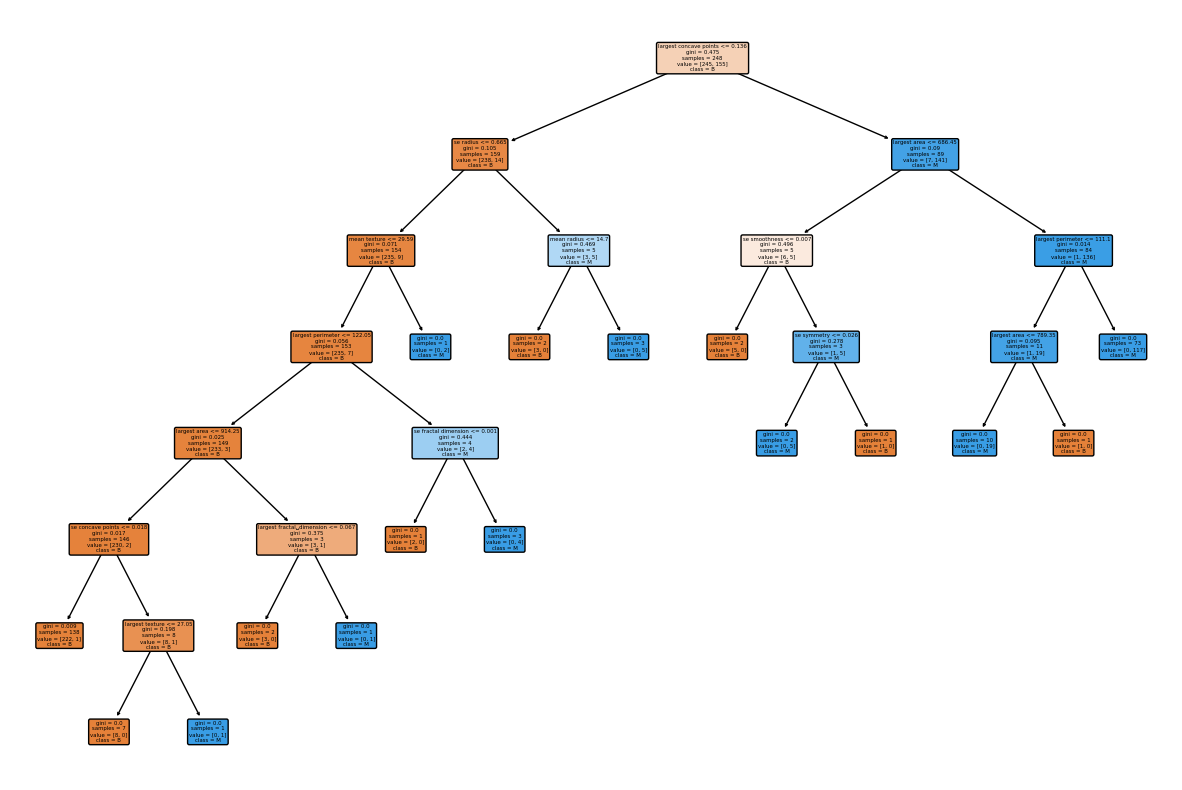

In [60]:
fig = plt.figure(figsize=(15, 10))
plot_tree(rnd_clf.estimators_[0], 
          feature_names=df.columns[2:],
          class_names=df["Diagnosis"], 
          filled=True, impurity=True, 

          rounded=True)

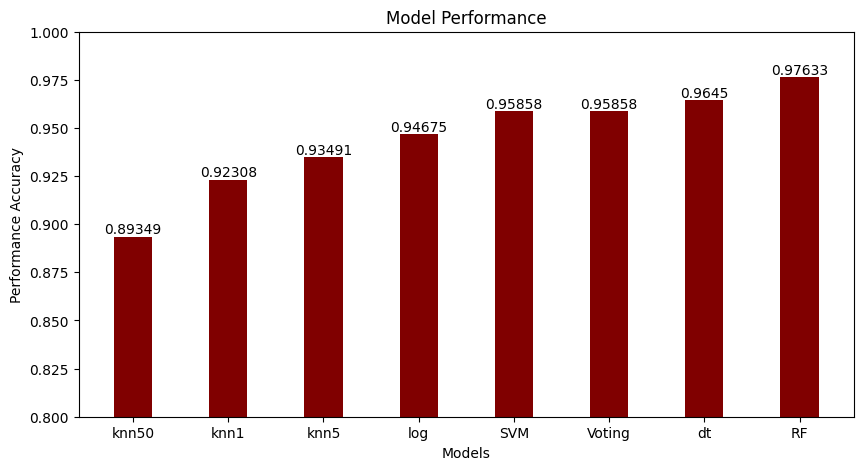

<module 'matplotlib.pyplot' from 'C:\\Users\\muzam\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages\\matplotlib\\pyplot.py'>

In [61]:
# sort by high to low
sortScores = dict(sorted(scores.items(), key=lambda item: item[1]))

# creating the dataset
classes = list(sortScores.keys())
values = list(sortScores.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
bar = plt.bar(classes, values, color ='maroon',
        width = 0.4)

# loops over and adds the values above the bar
for rect1 in bar :
    height = rect1.get_height()
    plt.annotate( "{}".format(height),(rect1.get_x() + rect1.get_width()/2, height),ha="center",va="bottom",fontsize=10)

#Setting y-axis precision for easier comparison
plt.ylim(0.8,1)

plt.xlabel("Models")
plt.ylabel("Performance Accuracy")
plt.title("Model Performance")
plt.show()
plt